# THIS IS A NEW NOTEBOOK to make poster for AGU 2022

In [1]:
# Import packages 
import sys
sys.path.append('../Plotting/')
""" Now you can imprt modules in ../Plotting"""
import xyp_plot as xyp

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.tri as tri
import matplotlib.colors as colors


import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import ana as a

import importlib


## Set file names, open data sets, read in

In [2]:
tag='ndg04'
f4='/glade/scratch/juliob/SAMwrf_'+tag+'_ML_super_v3.nc'
tag='ndg05'
f5='/glade/scratch/juliob/SAMwrf_'+tag+'_ML_super_v3.nc'
tag='ndg06'
f6='/glade/scratch/juliob/SAMwrf_'+tag+'_ML_super_v3.nc'
tag='ndg04_nov'
f4n='/glade/scratch/juliob/SAMwrf_'+tag+'_ML_super_v3.nc'


d4=xr.open_dataset( f4 )
d5=xr.open_dataset( f5 )
d6=xr.open_dataset( f6 )
d4n=xr.open_dataset( f4n )

lev=d4['lev']
lon=d4['lon']
lat=d4['lat']

## Calculate correlations between UTN and UTGW, and intrpolate onto regular lat lon grid

In [3]:
utn4=d4['UTEND_NDG']*86400.
utn4n=d4n['UTEND_NDG']*86400.
utgw5=d5['UTEND_GWDTOT']*86400.
utgw6=d6['UTEND_GWDTOT']*86400.
vtn4=d4['VTEND_NDG']*86400.
vtgw5=d5['VTEND_GWDTOT']*86400.
vtgw6=d6['VTEND_GWDTOT']*86400.

#means
gutn=np.mean(utn4,axis=0)
gutnn=np.mean(utn4n,axis=0)
gvtn=np.mean(vtn4,axis=0)
gutgw=np.mean(utgw5,axis=0)
gvtgw=np.mean(vtgw5,axis=0)
gutgwi=np.mean(utgw6,axis=0)
gvtgwi=np.mean(vtgw6,axis=0)
gutnx,xlon,xlat= a.c_o_xy(idata=gutn,lon=lon,lat=lat,dx=0.25,dy=0.25)
gutgwx,xlon,xlat= a.c_o_xy(idata=gutgw,lon=lon,lat=lat,dx=0.25,dy=0.25)

gutnnx,xlon,xlat= a.c_o_xy(idata=gutnn,lon=lon,lat=lat,dx=0.25,dy=0.25)

#std's
vutn=np.std(utn4,axis=0)
vutgw=np.std(utgw5,axis=0)
vutnx,xlon,xlat= a.c_o_xy(idata=vutn,lon=lon,lat=lat,dx=0.25,dy=0.25)
vutgwx,xlon,xlat= a.c_o_xy(idata=vutgw,lon=lon,lat=lat,dx=0.25,dy=0.25)

#calculate 3D pressure for later use
ps=d4['PS']
hyam=d4['hyam']
hybm=d4['hybm']
plev=d4['lev']

gps=np.average( ps, axis=0 )
ghya=np.average( hyam , axis=0 )
ghyb=np.average( hybm , axis=0 )
p3=a.press(PS=gps,hybm=ghyb,hyam=ghya )
p3x,xlon,xlat= a.c_o_xy(idata=p3,lon=lon,lat=lat,dx=0.25,dy=0.25)


[-20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.
  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.
   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.]


/glade/u/apps/opt/conda/envs/npl/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/glade/u/apps/opt/conda/envs/npl/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/glade/u/apps/opt/conda/envs/npl/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Pleas

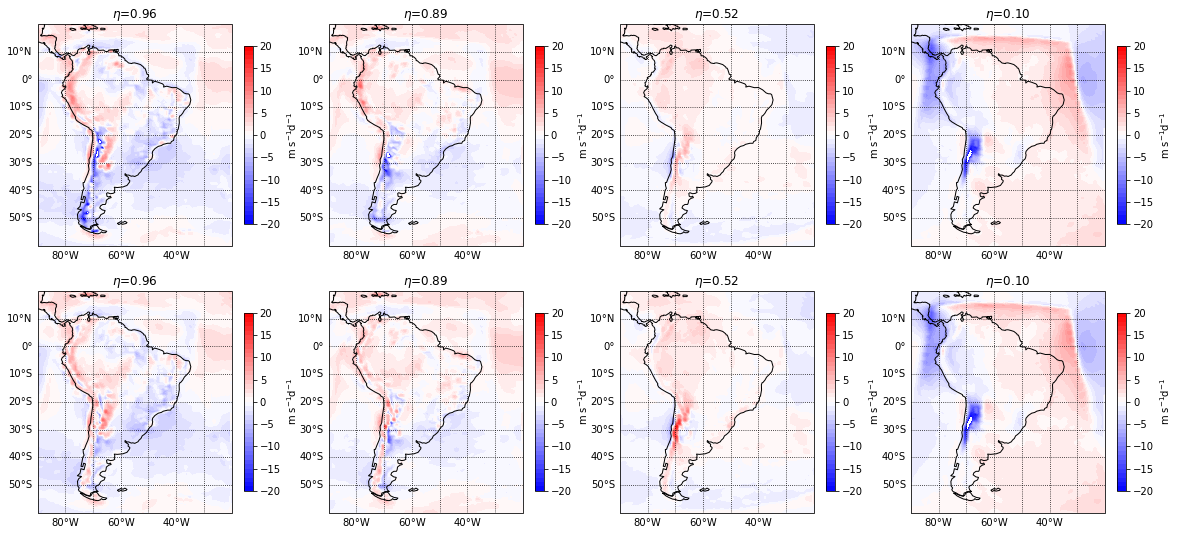

In [4]:
clevs=np.linspace(-20.,20.,num=41)
print(clevs)
cmap = plt.cm.bwr
fig = plt.figure(figsize=(20, 9))
levs=[29,26,20,10]
ipoo=0
#gutnx=gutnnx
for L in levs:
    ipoo=ipoo+1
    
    ax1 = fig.add_subplot(2, 4, ipoo , projection=ccrs.PlateCarree(central_longitude=0))
    cf = ax1.contourf(xlon, xlat, gutnx[L,:,:],  levels=clevs, cmap=cmap  , transform=ccrs.PlateCarree())
    #titl='$\eta$='+str(np.float(plev[L]/1000.))
    titl='$\eta$='+f"{np.float(plev[L]/1000.):.2f}"

    ax1.coastlines(resolution='110m')
    
    gl=ax1.gridlines(linestyle=':', color='black',draw_labels=True)  #, ylabels_right=None)
    gl.ylabels_right=False
    gl.xlabels_top=False
    
    ax1.set_title( titl ,fontsize=12, loc='center')
    plt.colorbar(cf , ax=ax1 , shrink=0.8,label='$\mathregular{m~s^{-1}d^{-1}}$')

for L in levs:
    ipoo=ipoo+1
    
    ax1 = fig.add_subplot(2, 4, ipoo , projection=ccrs.PlateCarree(central_longitude=0))
    cf = ax1.contourf(xlon, xlat, gutnnx[L,:,:],  levels=clevs, cmap=cmap  , transform=ccrs.PlateCarree())
    #titl='$\eta$='+str(np.float(plev[L]/1000.))
    titl='$\eta$='+f"{np.float(plev[L]/1000.):.2f}"

    ax1.coastlines(resolution='110m')
    
    gl=ax1.gridlines(linestyle=':', color='black',draw_labels=True)  #, ylabels_right=None)
    gl.ylabels_right=False
    gl.xlabels_top=False
    
    ax1.set_title( titl ,fontsize=12, loc='center')
    plt.colorbar(cf , ax=ax1 , shrink=0.8,label='$\mathregular{m~s^{-1}d^{-1}}$')


[-20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.
  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.
   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.]
j0= 120
why dont I plot
xv (280,)  nlev 32
pp (32, 280)
aa (32, 280)


Text(0, 0.5, 'Z(km)')

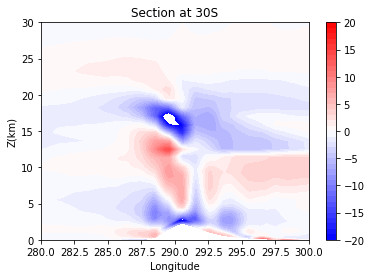

In [32]:
importlib.reload(xyp)
clevs=np.linspace(-20.,20.,num=41)
z3x=-7.*np.log(p3x/100_000.)
#xyp.pltxp(gutnx,p3x, xlon[0,:],lats=xlat[:,0],  zlim=[100000.,0.],lat0=-30.)
#plt.contourf(gutnx[:,120,:])
#plt.colorbar()
print(clevs)
xyp.pltxp(gutnx,z3x, xlon[0,:],lats=xlat[:,0],  zlim=[0.,30.],lat0=-30.,xlim=[280.,300.],clevs=clevs)
plt.title("Section at 30S")
plt.xlabel("Longitude")
plt.ylabel("Z(km)")

In [29]:
#r45,lev,lat,lon = a.corr_utn_utgw(f4,f5)
#r46,lev,lat,lon = a.corr_utn_utgw(f4,f6)
r45 = a.corr_utn_utgw(f4,f5)
r46 = a.corr_utn_utgw(f4,f6)

""" Interpolate to regular 0.25x0.25 grid """
r45x,xlon,xlat= a.c_o_xy(idata=r45,lon=lon,lat=lat,dx=0.25,dy=0.25)
r46x,xlon,xlat= a.c_o_xy(idata=r46,lon=lon,lat=lat,dx=0.25,dy=0.25)

Level=  31
Level=  30
Level=  29
Level=  28
Level=  27
Level=  26
Level=  25
Level=  24
Level=  23
Level=  22
Level=  21
Level=  20
Level=  19
Level=  18
Level=  17
Level=  16
Level=  15
Level=  14
Level=  13
Level=  12
Level=  11
Level=  10
Level=  9
Level=  8
Level=  7
Level=  6
Level=  5
Level=  4
Level=  3
Level=  2
Level=  1
Level=  31
Level=  30
Level=  29
Level=  28
Level=  27
Level=  26
Level=  25
Level=  24
Level=  23
Level=  22
Level=  21
Level=  20
Level=  19
Level=  18
Level=  17
Level=  16
Level=  15
Level=  14
Level=  13
Level=  12
Level=  11
Level=  10
Level=  9
Level=  8
Level=  7
Level=  6
Level=  5
Level=  4
Level=  3
Level=  2
Level=  1


[-1.   -0.95 -0.9  -0.85 -0.8  -0.75 -0.7  -0.65 -0.6  -0.55 -0.5  -0.45
 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05  0.1   0.15
  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75
  0.8   0.85  0.9   0.95  1.  ]


/glade/u/apps/opt/conda/envs/npl/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


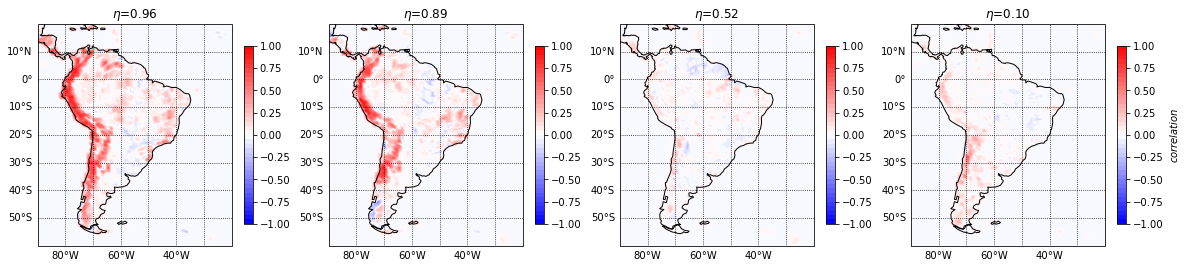

In [37]:
clevs=np.linspace(-1.,1.,num=41)
print(clevs)
cmap = plt.cm.bwr
fig = plt.figure(figsize=(20, 9))
ipoo=0

levs=[29,26,20,10]
ipoo=0
#gutnx=gutnnx
for L in levs:
    ipoo=ipoo+1
    
    ax1 = fig.add_subplot(2, 4, ipoo , projection=ccrs.PlateCarree(central_longitude=0))
    cf = ax1.contourf(xlon, xlat, r45x[L,:,:],  levels=clevs, cmap=cmap  , transform=ccrs.PlateCarree())
    #titl='$\eta$='+str(np.float(plev[L]/1000.))
    titl='$\eta$='+f"{np.float(plev[L]/1000.):.2f}"

    ax1.coastlines(resolution='110m')
    
    gl=ax1.gridlines(linestyle=':', color='black',draw_labels=True)  #, ylabels_right=None)
    gl.ylabels_right=False
    gl.xlabels_top=False
    
    ax1.set_title( titl ,fontsize=12, loc='center')
    if (ipoo==4):
        plt.colorbar(cf , ax=ax1 , shrink=0.8,label='$correlation$')
    else:
        plt.colorbar(cf , ax=ax1 , shrink=0.8)


In [ ]:
fig=plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

ax.set_global()
ax.gridlines()
plt.xlim(-90,-30)
plt.ylim(-55,10)
L=25
ax.quiver(lon, lat, gutn[L,:],gvtn[L,:] )  #, transform=vector_crs)
ax.quiver(lon, lat, gutgw[L,:],gvtgw[L,:],scale=250.1 ,color='red')  #, transform=vector_crs)
#ax.quiver(lon, lat, gutgwi[L,:],gvtgwi[L,:] ,scale=50,color='green')  #, transform=vector_crs)



In [ ]:

fig2 = plt.figure(figsize=(20, 9))
ipoo=0
for L in levs:
    ipoo=ipoo+1
    
    ax1 = fig2.add_subplot(2, 4, ipoo , projection=ccrs.PlateCarree(central_longitude=0))
    cf = ax1.contourf(xlon, xlat, r46x[L,:],  levels=clevs, cmap=cmap  , transform=ccrs.PlateCarree())

    ax1.coastlines(resolution='110m')
    ax1.gridlines(linestyle=':', color='black')
    ax1.set_title("Plot using pcolormesh",fontsize=12, loc='center')
    plt.colorbar(cf , ax=ax1 , shrink=0.8)


In [ ]:
print(np.shape(d5['hybi']))


utn4=d4['UTEND_NDG']*86400.
gutn4=np.average( np.abs(utn4), axis=0 )
utgw5=d5['UTEND_GWDTOT']*86400.
gutgw5=np.average( np.abs(utgw5), axis=0 ) 

oo=np.where( (gutgw5[28,:]>10.) & (gutn4[28,:]>4))
print(np.shape(oo))

gutgw5x,xlon,xlat= a.c_o_xy(idata=gutgw5,lon=lon,lat=lat,dx=0.25,dy=0.25)


In [ ]:
plt.plot(r45[29,:])
plt.xlim(2440,2450)
fig = plt.figure(figsize=(10, 9))

ax1 = fig.add_subplot(2, 1, 1 ) # , projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.tricontourf(lon,lat,gutn4[28,:])
ax1.plot(lon[oo[0][:]],lat[oo[0][:]],'x',color='white')
plt.colorbar(cf,ax=ax1)
ax1 = fig.add_subplot(2, 1, 2 ) # , projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.tricontourf(lon,lat,gutgw5[28,:])
plt.colorbar(cf,ax=ax1)


## 2D histograms of high-freq UTN vs UTGW

/glade/u/apps/opt/conda/envs/npl/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Log scale: values of z <= 0 have been masked
  app.launch_new_instance()


"\ny=d5['VTEND_GWDTOT'][0:,27:,:].values *86400. \nx=d4['VTEND_NDG'][0:,27:,:].values *86400.\nh2v=np.histogram2d(x.flatten(), y.flatten() ,bins=50 , range=[[-100.,100.],[-100,100]] )\n\nax = fig.add_subplot(1, 2, 2 ) # , projection=ccrs.PlateCarree(central_longitude=0))\ncf = ax.contourf(h2v[1][1:],h2v[2][1:],h2v[0],levels=clevs,cmap=cmap,norm=colors.LogNorm())\nax.set_aspect('equal','box')\nplt.colorbar(cf,ax=ax,shrink=0.6)\n"

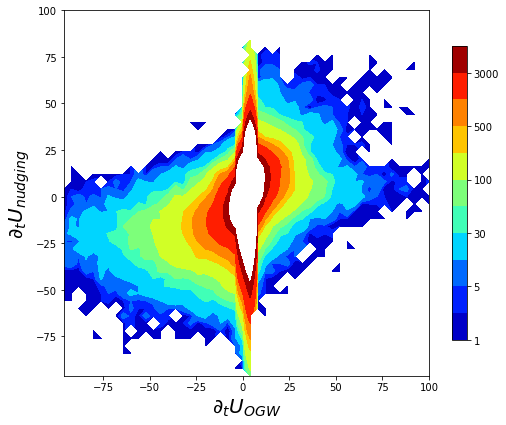

In [43]:
fig = plt.figure(figsize=(18, 9))

y=d5['UTEND_GWDTOT'][0:,27:,:].values *86400. 
x=d4['UTEND_NDG'][0:,27:,:].values *86400.
h2u=np.histogram2d(x.flatten(), y.flatten() ,bins=50 , range=[[-100.,100.],[-100,100]] )


cmap=mpl.colormaps['jet']
#cmap=cm.jet
clevs=[1,3,5,10,30,50,100,300,500,1000,3000,5000 ] #np.logspace(0,3)

ax = fig.add_subplot(1, 2, 1 ) # , projection=ccrs.PlateCarree(central_longitude=0))

ax.set_aspect('equal','box')


cf = ax.contourf(h2u[1][1:],h2u[2][1:],h2u[0],levels=clevs,cmap=cmap,norm=colors.LogNorm())
plt.colorbar(cf,ax=ax,shrink=0.6)
plt.xlabel("$\partial_t U_{OGW}$",fontsize=20)
plt.ylabel("$\partial_t U_{nudging}$",fontsize=20)

"""
y=d5['VTEND_GWDTOT'][0:,27:,:].values *86400. 
x=d4['VTEND_NDG'][0:,27:,:].values *86400.
h2v=np.histogram2d(x.flatten(), y.flatten() ,bins=50 , range=[[-100.,100.],[-100,100]] )

ax = fig.add_subplot(1, 2, 2 ) # , projection=ccrs.PlateCarree(central_longitude=0))
cf = ax.contourf(h2v[1][1:],h2v[2][1:],h2v[0],levels=clevs,cmap=cmap,norm=colors.LogNorm())
ax.set_aspect('equal','box')
plt.colorbar(cf,ax=ax,shrink=0.6)
"""


0.6903582734851224 85848.59


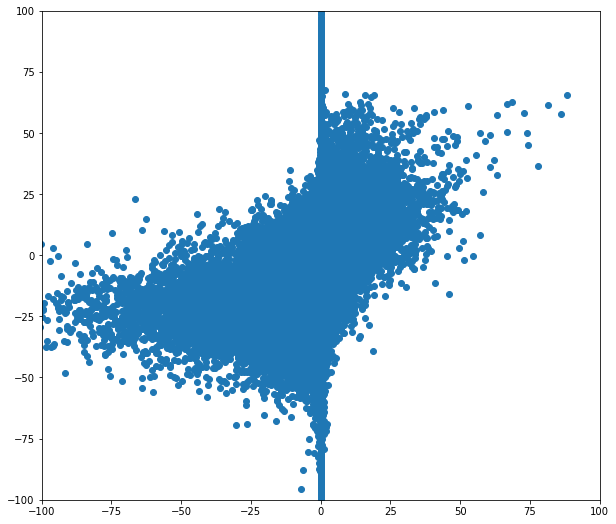

In [42]:

fig2=plt.figure(figsize=(10, 9))
#sca=plt.scatter( gutgw5[28,oo[0][:]],gutn4[28,oo[0][:]])

sca=plt.scatter( d5['UTEND_GWDTOT'][:,30,:]*86400. , d4['UTEND_NDG'][:,30,:]*86400. )
plt.xlim(-100,100)
plt.ylim(-100,100)
utn4.shape
print(r45[29,2446],gps[2446])
#plt.plot(r45[29,:])

In [ ]:
d4['UTEND_GWDTOT'].shape
